# Cleaning the records

In this Jupyter Notebook, we will execute a exploratory analysis.

Instructions: To run this notebook is required to have a the data/gen/merged.csv file. Generate it using the merge.ipynb


In [243]:
# Importing the libraries
import pandas as pd
import seaborn as sns  # Para visualización de datos mas avanzada
%matplotlib inline
import matplotlib.pyplot as plt # Para visualización de datos

In [244]:
# Constants for the resources
DATA_FILE = 'data/gen/merged.csv'
LABELS_FILE = 'data/labels/labels.csv'

In [245]:
df_labels = pd.read_csv(LABELS_FILE, delimiter='|')

In [246]:
# Importing the dataset
df = pd.read_csv(DATA_FILE)
df.head()

C:\Users\chama\AppData\Local\Temp\ipykernel_7944\947250292.py:2: DtypeWarning: Columns (3,6,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE)


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OCUP,AGR_DEDICA,AGRESORES_OTROS_TOTAL,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,MEDIDAS_SEGURIDAD,LEY_APLICABLE
0,2013.0,Enero,22.0,Guatemala,Víctima,Mujeres,38,02,01,01,...,Ocupaciones ignoradas,NaN,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Organismo Judicial,Medidas otorgadas,Ambas leyes (VIF y VCM)
1,2013.0,Enero,24.0,Guatemala,Víctima,Mujeres,20,01,Ninguna,01,...,Trabajadores ambulantes de servicios y afines,NaN,Ignorado,99.0,99.0,99.0,99.0,Ministerio Público,NaN,NaN
2,2013.0,Enero,21.0,Guatemala,Víctima,Mujeres,21,02,01,01,...,Albañiles,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
3,2013.0,Enero,2.0,Guatemala,Víctima,Hombres,70,Ninguna,Ninguna,Ninguna,...,NaN,Quehaceres del Hogar,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
4,2013.0,Enero,10.0,Guatemala,Víctima,Mujeres,36,Ignorado,Ignorado,Ignorado,...,Ocupaciones no especificadas en las anteriores,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN


Nota: Vemos que tenemos columnas con tipos de datos irregulares. Columnas (3,6,26,28,29)


In [247]:
df.shape

(327781, 52)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327781 entries, 0 to 327780
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_EMISION            327781 non-null  float64
 1   MES_EMISION            327781 non-null  object 
 2   DIA_EMISION            327781 non-null  float64
 3   DEPTO_MCPIO            327781 non-null  object 
 4   QUIEN_REPORTA          327781 non-null  object 
 5   VIC_SEXO               327781 non-null  object 
 6   VIC_EDAD               327781 non-null  object 
 7   TOTAL_HIJOS            326215 non-null  object 
 8   NUM_HIJ_HOM            326215 non-null  object 
 9   NUM_HIJ_MUJ            326215 non-null  object 
 10  VIC_ALFAB              327144 non-null  object 
 11  VIC_ESCOLARIDAD        327144 non-null  object 
 12  VIC_EST_CIV            326215 non-null  object 
 13  VIC_GRUPET             327781 non-null  object 
 14  VIC_NACIONAL           327781 non-nu

In [249]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                1566
NUM_HIJ_HOM                1566
NUM_HIJ_MUJ                1566
VIC_ALFAB                   637
VIC_ESCOLARIDAD             637
VIC_EST_CIV                1566
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                 637
VIC_OCUP                 217775
VIC_DEDICA               111010
VIC_DISC                      0
TIPO_DISCAQ              320468
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                       0
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA

In [250]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.477758
NUM_HIJ_HOM               0.477758
NUM_HIJ_MUJ               0.477758
VIC_ALFAB                 0.194337
VIC_ESCOLARIDAD           0.194337
VIC_EST_CIV               0.477758
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.194337
VIC_OCUP                 66.439177
VIC_DEDICA               33.867125
VIC_DISC                  0.000000
TIPO_DISCAQ              97.768937
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO             

## Eliminación de columnas difusas.


In [251]:
# Remove columns

COLUMNS_TO_REMOVE = [
    'TIPO_DISCAQ',
    'INST_DONDE_DENUNCIO',
    'MEDIDAS_SEGURIDAD'
]


df = df.drop(columns=COLUMNS_TO_REMOVE)

## Limpieza de valores pequeñas cantidades de valores nulos.


In [252]:
REMOVE_NULLS_OVER = [
    'TOTAL_HIJOS',
    'NUM_HIJ_HOM',
    'NUM_HIJ_MUJ',
    'VIC_ALFAB',
    'VIC_ESCOLARIDAD',
    'VIC_EST_CIV',
    'VIC_TRABAJA',
    'AGR_EST_CIV',
]
# Remove the rows with nulls in the specified columns
df = df.dropna(subset=REMOVE_NULLS_OVER)

In [270]:
df['TOTAL_HIJOS'].value_counts()

TOTAL_HIJOS
01          72480
02          66540
Ignorado    58921
03          43416
Ninguna     36333
04          20211
05          10491
06           4919
07           2888
08           1672
09            812
10            556
11            250
12            181
13             56
14             25
15             15
16              7
17              4
19              1
Name: count, dtype: int64

## Conversión de datos


#### Convierte la columna `VIC_EDAD` de tipo numérico


In [253]:
df['VIC_EDAD'] = pd.to_numeric(df['VIC_EDAD'], errors='coerce')
df['VIC_EDAD'] = df['VIC_EDAD'].fillna(98)

#### Hace la columna AGR_EDAD de tipo numérico


In [254]:
df['AGR_EDAD'] = pd.to_numeric(df['AGR_EDAD'], errors='coerce')
df['AGR_EDAD'] = df['AGR_EDAD'].fillna(98)

#### Hacer la columna HEC_DIA de tipo numérico


In [255]:
df['HEC_DIA'] = pd.to_numeric(df['HEC_DIA'], errors='coerce')
df['HEC_DIA'] = df['HEC_DIA'].fillna(99)

#### Hacer columna MES_EMISION a tipo numérico


In [256]:
# Diccionario para convertir los nombres de los meses a números
month_dict = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Reemplazar los nombres de los meses por números
df['MES_EMISION'] = df['MES_EMISION'].str.lower().map(month_dict)

## Estandarizar datos


#### Unificamos las columnas `AGR_DEDICA` y `AGR_OCUP`


In [257]:

df['AGR_DEDICA'] = df['AGR_DEDICA'].fillna('') + df['AGR_OCUP'].fillna('')
df['VIC_DEDICA'] = df['VIC_DEDICA'].fillna('') + df['VIC_OCUP'].fillna('')

# Eliminar las columnas que ya no necesitamos
df = df.drop(columns=['AGR_OCUP', 'VIC_OCUP'])

# Quitar los registros que no tienen información de ocupación
df = df[df['VIC_DEDICA'].str.strip().astype(bool)]
df = df[df['AGR_DEDICA'].str.strip().astype(bool)]

#### Unifica `ANO_EMISION`, `MES_EMISION` y `DIA_EMISION` en una nueva columna.


In [258]:
# Casteo de las columnas
df['ANO_EMISION'] = df['ANO_EMISION'].astype(int)
df['DIA_EMISION'] = df['DIA_EMISION'].astype(int)

# Renombrar las columnas para que sean asignadas correctamente
df_temp = df.rename(columns={'ANO_EMISION': 'year',
                    'MES_EMISION': 'month', 'DIA_EMISION': 'day'})

# Combina las columnas year, month, day en una sola columna
df['FECHA_EMISION'] = pd.to_datetime(df_temp[['year', 'month', 'day']])

#### Estandarizamos `DEPTO_MCPIO` para utilizar etiquetas y no identificadores.


In [259]:
# Paso 1: Utilizando df_labels obtenemos las filas donde Código es ANO_EMISION
df_util_labels = df_labels[df_labels['Código'] == 'DEPTO_MCPIO'].copy()
# Paso 2: Para df 'DEPTO_MCPIO' casteamos a string, hacemos strip y todo a minúsculas
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].astype(str).str.strip().str.lower()

# Paso 3: Para cualquier variable en 'DEPTO_MCPIO' que tenga '.' obtenemos solo el primer valor
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].str.split('.').str[0]

# Paso 4: Utilizando df_util_labels, casteamos Valor y Etiqueta a string
df_util_labels['Valor'] = df_util_labels['Valor'].astype(str)
df_util_labels['Etiqueta'] = df_util_labels['Etiqueta'].astype(str)

# Paso 5: Repetimos, para cualquier valor en 'Valor' que tenga '.' obtenemos solo el primer valor
df_util_labels['Valor'] = df_util_labels['Valor'].str.split('.').str[0]

# Paso 6: Dado que los DEPTO_MCPIO tiene valores mezclados de Valor y Etiqueta
# Procedemos a estandarizar DEPTO_MCPIO solo con los valores de Etiqueta
# Osea si en DEPTO_MCPIO encontramos un valor que está en Valor, lo reemplazamos por el valor de Etiqueta
# Si no entonces dejamos el valor original

# Crear un diccionario de mapeo de 'Valor' a 'Etiqueta'
map_dict = df_util_labels.set_index('Valor')['Etiqueta'].to_dict()

# Aplicar el mapeo a la columna 'DEPTO_MCPIO'. Si un valor no se encuentra en el diccionario, se deja como está.
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].map(lambda x: map_dict.get(x, x))

In [260]:
df['DEPTO_MCPIO'].value_counts()

DEPTO_MCPIO
Guatemala                   15220
guatemala                   10381
cobán                        6056
Cobán                        5609
Villa Nueva                  4920
                            ...  
Barillas                        3
santiago chimaltenanango        2
chiantla                        1
san miguel uspantán             1
Chiantla                        1
Name: count, Length: 704, dtype: int64

Nota: Existen 340 departamentos distintos, vemos que obtuvimos 375 tipos. Esto podría ser causado por errores ortográficos.


#### `VIC_ALFAB` y `AGR_ALFAB`


In [261]:
df['VIC_ALFAB'].replace('Si', 'Alfabeta', inplace=True)
df['VIC_ALFAB'].replace('No', 'Analfabeta', inplace=True)
df['AGR_ALFAB'].replace('Si', 'Alfabeta', inplace=True)
df['AGR_ALFAB'].replace('No', 'Analfabeta', inplace=True)

#### `VIC_ESCOLARIDAD` y `AGR_ESCOLARIDAD`


In [262]:
df['VIC_ESCOLARIDAD'].replace('Ninguna', 10)
df['VIC_ESCOLARIDAD'].replace('Ignorado', 99)
df['VIC_ESCOLARIDAD'] = pd.to_numeric(df['VIC_ESCOLARIDAD'], errors='coerce')
df['VIC_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

df['AGR_ESCOLARIDAD'].replace('Ninguna', 10)
df['AGR_ESCOLARIDAD'].replace('Ignorado', 99)
df['AGR_ESCOLARIDAD'] = pd.to_numeric(df['AGR_ESCOLARIDAD'], errors='coerce')
df['AGR_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

#### `TOTAL_HIJOS`


In [271]:
df['TOTAL_HIJOS'].replace('Ignorado', 99)
df['TOTAL_HIJOS'].replace('Ninguna', 0)
# To numeric
df['TOTAL_HIJOS'] = pd.to_numeric(df['TOTAL_HIJOS'], errors='coerce')
df['TOTAL_HIJOS'] = df['TOTAL_HIJOS'].fillna(99)  # This means unknown

#### `VIC_TRABAJA` y `AGR_TRABAJA`


In [263]:
df['VIC_TRABAJA'].replace(
    'Si', 'Si trabaja por un salario o ingreso', inplace=True)
df['VIC_TRABAJA'].replace(
    'No', 'No trabaja por un salario o ingreso', inplace=True)

df['AGR_TRABAJA'].replace(
    'Si', 'Si trabaja por un salario o ingreso', inplace=True)
df['AGR_TRABAJA'].replace(
    'No', 'No trabaja por un salario o ingreso', inplace=True)

#### `HEC_ANO`


In [264]:
df['HEC_ANO'].replace('Ignorado', 9999)
df['HEC_ANO'] = pd.to_numeric(df['HEC_ANO'], errors='coerce')

#### `AGRESORES_OTROS_TOTAL`


In [265]:
df['AGRESORES_OTROS_TOTAL'].replace('Ignorado', 99, inplace=True)
df['AGRESORES_OTROS_TOTAL'].replace('Ninguna', 0, inplace=True)
df['AGRESORES_OTROS_TOTAL'] = pd.to_numeric(
    df['AGRESORES_OTROS_TOTAL'], errors='coerce')

#### `AGR_OTROS_HOM` y `AGR_OTRAS_MUJ` y `AGR_OTROS_N_OS` y `AGR_OTRAS_N_AS`


In [269]:
df['AGR_OTROS_HOM'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_HOM'] = pd.to_numeric(df['AGR_OTROS_HOM'], errors='coerce')

df['AGR_OTRAS_MUJ'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_MUJ'] = pd.to_numeric(df['AGR_OTRAS_MUJ'], errors='coerce')

df['AGR_OTROS_N_OS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_N_OS'] = pd.to_numeric(df['AGR_OTROS_N_OS'], errors='coerce')

df['AGR_OTRAS_N_AS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_N_AS'] = pd.to_numeric(df['AGR_OTRAS_N_AS'], errors='coerce')

#### `LEY_APLICABLE`


In [267]:
df['LEY_APLICABLE'].replace('IGNORADO', 'Ignorado', inplace=True)
df['LEY_APLICABLE'].replace('AMBAS', 'AMBAS_LEYES_VIF/VCM', inplace=True)

## Otros


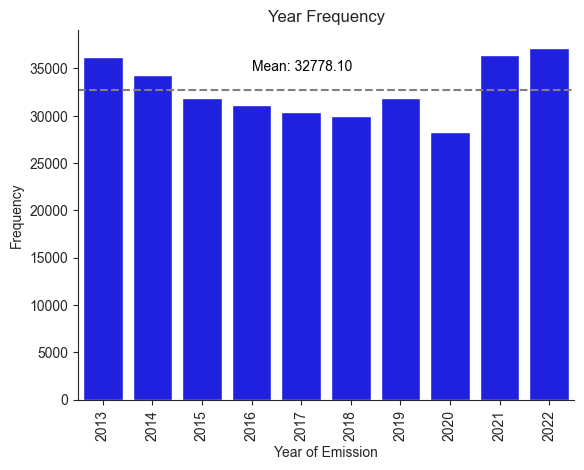

In [ ]:
def year_frequency_plot(df, column_name):
    # Set the theme
    sns.set_style("ticks")

    # Calculate the year frequency
    year_frequency = df[column_name].value_counts().sort_index()
    year_frequency.index = year_frequency.index.astype(int)
    # Create a bar plot
    sns.barplot(x=year_frequency.index, y=year_frequency.values, color='b')

    # Calculate the mean of the year frequency
    mean_year = year_frequency.mean()

    # Add a horizontal line for the mean
    plt.axhline(mean_year, color='grey', linestyle='--')

    # Add a text label for the mean
    plt.text(3, mean_year + 2000, f'Mean: {mean_year:.2f}', color='black')

    # Improve the plot appearance
    plt.xlabel('Year of Emission')
    plt.ylabel('Frequency')
    plt.title('Year Frequency')
    plt.xticks(rotation=90)
    sns.despine()

    # Show the plot
    plt.show()


year_frequency_plot(df, 'ANO_EMISION')

In [ ]:
# Save the cleaned data
df.to_csv('data/gen/cleaned.csv', index=False)